<a href="https://colab.research.google.com/github/sidneyarcidiacono/derivatives-jcat/blob/main/Copy_of_partial_derivative_jcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this session you should be able to...

1. Take the derivative of a function over one variable
1. Take the partial derivative of a function over all of its variables 
1. Find the minimum of the function to obtain the best line that represents relationships between two variables in a dataset

## Why are derivatives important?

Derivatives are the foundation for Linear Regression (a topic we'll cover later in the course) that allows us to obtain the best line that represents relationships between two variables in a dataset.

## Introduction to Derivatives

The process of fidning a derivative is called **Differentiation**, which is a technique used to calculate the slope of a graph at different points.

### Activity - Derivative Tutorial:

1. Go through this [Derivative tutorial from Math Is Fun](https://www.mathsisfun.com/calculus/derivatives-introduction.html) (15 min)
1. When you're done, talk with a partner about topics you still have questions on. See if you can answer each other's questions. (5 min)
1. We'll then go over questions on the tutorial as a class (10 min)

### Review Diagram

Review the below diagram as a class, and compare with what you just learned in the above Derivative Tutorial. Note that a Gradient Function is just another name for the Derivative of a function:

<img src="https://github.com/sidneyarcidiacono/QL1.1/blob/master/Notebooks/Calculus/diff_y_x2.png?raw=1" width="600" height="600">
<img src="https://github.com/sidneyarcidiacono/QL1.1/blob/master/Notebooks/Calculus/diff_y_x2_gragh.png?raw=1" width="600" height="600">

## Derivative Formula

- Choose small $\Delta x$

- $f^\prime(x) = \frac{d}{dx}f(x) = \frac{\Delta y}{\Delta x}  = \frac{f(x + \Delta x) - f(x)}{\Delta x}$

Remember that $\Delta x$ approaches 0. So if plugging in a value in the above formula, choose a _very_ small number, or simplify the equation further such that all $\Delta x = 0$, like we saw in the tutorial

## Activity: Write a Python function that calculates the gradient of $x^2$ at $x = 3$ and $x = -2$ using the above definition

In [ ]:
def f(x):
    return x**2


eps = 1e-6
x = 3
print((f(x + eps) - f(x)) / eps)
x = -2
print((f(x + eps) - f(x)) / eps)

6.000001000927568
-3.999998999582033


Note that these values match $2x$, our derivative of $x^2$:

$2*3 = 6$

$2 * -2 = -4$

## Derivative Table

As a shortcut, use the second page of this PDF to find the derivative for common formulas. Utilize this as a resource going forward!

- https://www.qc.edu.hk/math/Resource/AL/Derivative%20Table.pdf

## Extend Gradient into Two-Dimensional Space

Now we know how to calculate a derivative of one variable. But what if we have two?

To do this, we need to utilize **Partial Derivatives**. Calculating a partial derivative is essentially calculating two derivatives for a function: one for each variable, where they other variable is set to a constant.

### Activity - Partial Derivative Video

Lets watch this video about Partial Derivative Intro from Khan Academy: https://youtu.be/AXqhWeUEtQU

**Note:** Here are some derivative shortcuts that will help in the video:

$\frac{d}{dx}x^2 = 2x$

$\frac{d}{x}sin(x) = cos(x)$

$\frac{d}{dx}x = 1$

### Activity - Now You Try!
Consider the function $f(x, y) = \frac{x^2}{y}$

- Calculate the first order partial derivatives ($\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$) and evaluate them at the point $P(2, 1)$.

## We can use the Symbolic Python package (library) to compute the derivatives and partial derivatives

In [ ]:
from sympy import symbols, diff
# initialize x and y to be symbols to use in a function
x, y = symbols('x y', real=True)
f = (x**2)/y
# Find the partial derivatives of x and y
fx = diff(f, x, evaluate=True) # partial derivative of f(x,y) with respect to x
fy = diff(f, y, evaluate=True) # partial derivative of f(x,y) with respect to y
print(fx)
print(fy)
# print(f.evalf(subs={x: 2, y: 1}))
print(fx.evalf(subs={x: 2, y: 1}))
print(fy.evalf(subs={x: 2, y: 1}))

2*x/y
-x**2/y**2
4.00000000000000
-4.00000000000000


## Optional Reading: Tensorflow is a powerful package from Google that calculates the derivatives and partial derivatives numerically 

In [ ]:
import tensorflow as tf 

x = tf.Variable(2.0)
y = tf.Variable(1.0)

with tf.GradientTape(persistent=True) as t:
    z = tf.divide(tf.multiply(x, x), y)

# Use the tape to compute the derivative of z with respect to the
# intermediate value x and y.
dz_dx = t.gradient(z, x)
dz_dy = t.gradient(z, y)


print(dz_dx)
print(dz_dy)

# All at once:
gradients = t.gradient(z, [x, y])
print(gradients)


del t

## Optional Reading: When x and y are declared as constant, we should add `t.watch(x)` and `t.watch(y)`

In [ ]:
import tensorflow as tf 

x = tf.constant(2.0)
y = tf.constant(1.0)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    t.watch(y)
    z = tf.divide(tf.multiply(x, x), y)

# Use the tape to compute the derivative of z with respect to the
# intermediate value y.
dz_dx = t.gradient(z, x)
dz_dy = t.gradient(z, y)

# Calculate Partial Derivative from Definition

In [ ]:
def f(x, y):
    return x**2/y


eps = 1e-6
x = 2
y = 1
print((f(x + eps, y) - f(x, y)) / eps)
print((f(x, y + eps) - f(x, y)) / eps)

4.0000010006480125
-3.9999959997594203


Looks about right! This works rather well, but it is just an approximation. Also, you need to call `f()` at least once per parameter (not twice, since we could compute `f(x, y)` just once). This makes this approach difficult to control for large systems (for example neural networks).

## Why Do we need Partial Gradients?

In many applications, more specifically DS applications, we want to find the Minimum of a cost function

- **Cost Function:** a function used in machine learning to help correct / change behaviour to minimize mistakes. Or in other words, a measure of how wrong the model is in terms of its ability to estimate the relationship between x and y. [Source](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)


Why do we want to find the minimum for a cost function? Given that a cost function mearues how wrong a model is, we want to _minimize_ that error!

In Machine Learning, we frequently use models to run our data through, and cost functions help us figure out how badly our models are performing. We want to find parameters (also known as **weights**) to minimize our cost function, therefore minimizing error!

We find find these optimal weights by using a **Gradient Descent**, which is an algorithm that tries to find the minimum of a function (exactly what we needed!). The gradient descent tells the model which direction it should take in order to minimize errors, and it does this by selecting more and more optimal weights until we've minimized the function! We'll learn more about models when we talk about Linear Regression in a future lesson, but for now, let's review the Gradient Descent process with the below images, given weights $w_0$ and $w_1$:

<img src="https://github.com/sidneyarcidiacono/QL1.1/blob/master/Notebooks/Calculus/gradient_descent.png?raw=1" width="800" height="800">

Look at that bottom right image. Looks like we're using partial derivatives to find out optimal weights. And we know exactly how to do that!

## Finding minimum of a function

Assume we want to minimize the function $J$ which has two weights $w_0$ and $w_1$

We have two options to find the minimum of $J(w_0, w_1)$:

1. Take partial derivatives of $J(w_0, w_1)$ with relation to $w_0$ and $w_1$:

$\frac{\partial J(w_0, w_1)}{\partial w_0}$

$\frac{\partial J(w_0, w_1)}{\partial w_1}$

And find the appropriate weights such that the partial derivatives equal 0:

$\frac{\partial J(w_0, w_1)}{\partial w_0} = 0$

$\frac{\partial J(w_0, w_1)}{\partial w_1} = 0$

In this approach we should solve system of linear or non-linear equation

2. Use the Gradient Descent algorithm:

First we need to define two things:

- A step-size alpha ($\alpha$) -- also called the *learning rate* -- as a small number (like $1.e-5$)
- An arbitrary random initial value for $w_0$ and $w_1$: $w_0 = np.random.randn()$ and $w_1 = np.random.randn()$

Finally, we need to search for the most optimal $w_0$ and $w_1$ by using a loop to update the weights until we find the most optimal weights. We'll need to establish a threshold to compare weights to know when to stop the loop. For example, if the weight update -- the change in the weight parameter -- from one iteration is within 0.0001 of the weight from the previous iteration, we can stop the loop (0.0001 is our threshold here)

Let's review some pseudocode for how to implement this algorithm:

```
# initialization
initialize the following:
    a starting weight value -- an initial guess, could be random
    the learning rate (alpha), a small number (we'll choose 1.e-5)
    the threshold -- set this to 1.e-4
    the current weight update -- initialize to 1

# weight update loop
while the weight update is greater than the threshold:
    store the current values of the weights into a previous value variable 
    set the weight values to new values based on the algorithm, by adding the weight updates
```

How do we `set the weight values to new values based on the algorithm`? by using the below equations:
    
$w_0 = w_0 - \alpha \frac{\partial J(w_0, w_1)}{\partial w_0}$
        
$w_1 = w_1 - \alpha \frac{\partial J(w_0, w_1)}{\partial w_1}$


Finish the "starter code" block below, creating real code from the pseudocode!


**Stretch Challenge:** We may also want to limit the number of loops we do, in addition to checking the threshold. Determine how we may go about doing that


## Resources

- [Derivative tutorial from Math Is Fun](https://www.mathsisfun.com/calculus/derivatives-introduction.html) 
- [Derivative Table](https://www.qc.edu.hk/math/Resource/AL/Derivative%20Table.pdf)
- [Khan Academy - Partial Derivatives video](https://www.youtube.com/watch?v=AXqhWeUEtQU&feature=youtu.be)
- [Towards Data Science - Machine Learning Fundamentals: cost functions and gradient Descent](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)

## Gradient descent in one dimension

In [ ]:
# pseudo-code
def minimize(f):
    # Initialize
    
    # run the weight update loop until it terminates
    
    # return the current weights

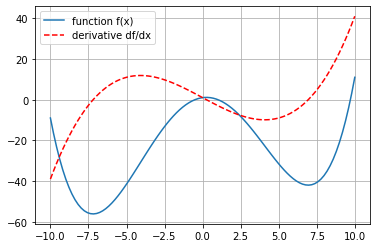

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
eps = 1.e-10

# define an interesting function to minimize
x = np.linspace(-10,10, 100)
fx =lambda x: (1/50)*x**4 - 2*x**2 + x + 1 
df_dx = lambda x: (4/50)*x**3 - 4*x + 1
plt.plot(x,fx(x),label = 'function f(x)')
plt.plot(x,df_dx(x),'r--',label = 'derivative df/dx')
plt.legend()
plt.grid()

### gradient descent function

In [ ]:
def minimize(fx,x_init):
    # Initialize
    alpha = 1.e-6
    thresh = 1.e-4
    weight_update = 1.
    x_values = []
    max_iter = 1000
    n_iter = 0
    x = x_init
    eps = 1.e-10
    
    # run the weight update loop until it terminates
    while np.abs(weight_update) > thresh: #and n_iter < max_iter:
        n_iter+=1
        df_dx = (fx(x+eps) - fx(x))/eps
        weight_update = -alpha*df_dx
        x = x + weight_update
        x_values.append(x) 
    
    # return the final value of the weight -- which should correspond to the minimum of the function
    return x, x_init, x_values, n_iter

### Choose an initial value for x, then run gradient descent

In [ ]:
np.random.seed(42)
x_init = np.random.uniform(-10,10,1) # choose a random starting point
print(x_init)
x_star, x_init, x_values, n_iter = minimize(f,x_init)
print(f'Started at {x_init}, found minimum {x_star} after {n_iter} iterations')

[-2.50919762]
Started at [-2.50919762], found minimum [-2.5092074] after 1 iterations


### Check that the derivative of the function is indeed zero at the minimum found by gradient descent

In [ ]:
# derivative, from calculus 
print(f'derivative from calculus: {df_dx(x_star)}')

# derivative, from definition
print(f'derivative from calculus:  {(fx(x_star + eps) - fx(x_star) )/eps}')

derivative from calculus: [10.01321418]
derivative from calculus:  [10.01321692]


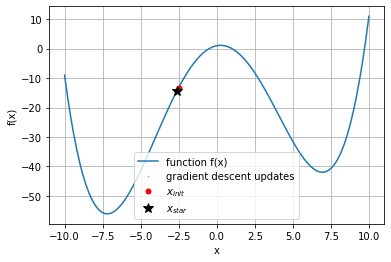

In [ ]:
x_values = np.array(x_values)
plt.plot(x,fx(x),label = 'function f(x)')
plt.plot(np.array(x_values),fx(x_values),'.',markersize = 1, label='gradient descent updates')
plt.plot(x_init,fx(x_init),'r.',markersize = 10, label = '$x_{init}$')
plt.plot(x_star,fx(x_star),'k*',markersize = 10, label = '$x_{star}$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='best');

In [ ]:
def derivative(fx, x):
    delta_x = 1.e-10
    df_dx = (fx(x + delta_x) - fx(x))/delta_x
    return df_dx

In [ ]:
derivative(fx, -8.75)

-17.593890788702993